In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [2]:
!unzip "Datasets.zip"
%ls

Archive:  Datasets.zip
   creating: Datasets/Anthracnose/
  inflating: Datasets/Anthracnose/20211008_124249 (Custom).jpg  
  inflating: Datasets/Anthracnose/20211008_124250 (Custom).jpg  
  inflating: Datasets/Anthracnose/20211008_124252 (Custom).jpg  
  inflating: Datasets/Anthracnose/20211008_124253 (Custom).jpg  
  inflating: Datasets/Anthracnose/20211008_124256 (Custom).jpg  
  inflating: Datasets/Anthracnose/20211008_124301 (Custom).jpg  
  inflating: Datasets/Anthracnose/20211008_124302 (Custom).jpg  
  inflating: Datasets/Anthracnose/20211008_124305 (Custom).jpg  
  inflating: Datasets/Anthracnose/20211008_124306 (Custom).jpg  
  inflating: Datasets/Anthracnose/20211008_124310 (Custom).jpg  
  inflating: Datasets/Anthracnose/20211008_124312 (Custom).jpg  
  inflating: Datasets/Anthracnose/20211008_124334 (Custom).jpg  
  inflating: Datasets/Anthracnose/20211008_124336 (Custom).jpg  
  inflating: Datasets/Anthracnose/20211008_124341 (Custom).jpg  
  inflating: Datasets/Anthracnos

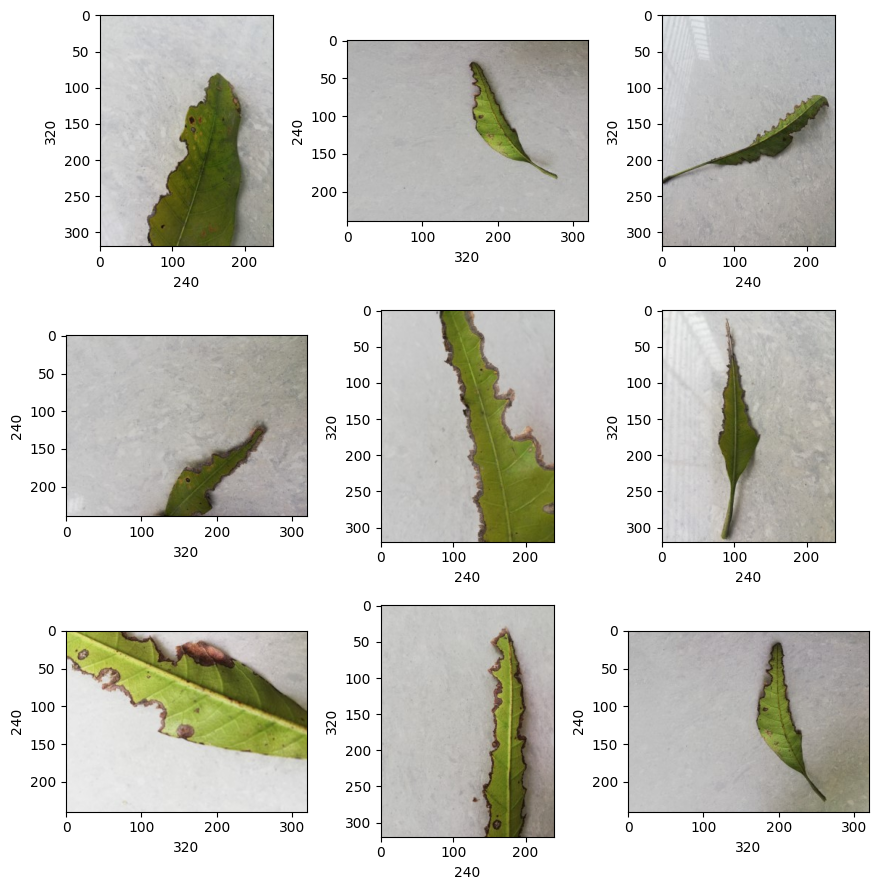

In [3]:
#Visualizing and resizing the images
#Plotting some images to check if the data has loaded properly or not
plt.figure(figsize=(9,9))
path="/content/Datasets/Bacterial Canker"
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.tight_layout()
  rand_img=imread(path+'/'+random.choice(os.listdir(path)))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize=10) #width of image
  plt.ylabel(rand_img.shape[0],fontsize=10) #height of image

In [4]:
import os
def dataframe_maker(path):
  file_paths=[]
  labels=[]

  folds=os.listdir(path)
  for fold in folds:
    fold_path=os.path.join(path,fold)
    file_list=os.listdir(fold_path)
    for file in file_list:
      file_path=os.path.join(fold_path,file)
      file_paths.append(file_path)
      labels.append(fold)
  file_series=pd.Series(file_paths,name="file_paths")
  label_series=pd.Series(labels,name="labels")
  df=pd.concat([file_series,label_series],axis=1)
  return df

In [5]:
df=dataframe_maker("/content/Datasets")

In [6]:
df

,file_paths,labels
0,/content/Datasets/Bacterial Canker/IMG_2021110...,Bacterial Canker
1,/content/Datasets/Bacterial Canker/IMG_2021110...,Bacterial Canker
2,/content/Datasets/Bacterial Canker/IMG_2021110...,Bacterial Canker
3,/content/Datasets/Bacterial Canker/IMG_2021110...,Bacterial Canker
4,/content/Datasets/Bacterial Canker/IMG_2021110...,Bacterial Canker
...,...,...
3535,/content/Datasets/Powdery Mildew/IMG_20211107_...,Powdery Mildew
3536,/content/Datasets/Powdery Mildew/20211109_1223...,Powdery Mildew
3537,/content/Datasets/Powdery Mildew/IMG_20211107_...,Powdery Mildew
3538,/content/Datasets/Powdery Mildew/20211109_1217...,Powdery Mildew


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_paths  3540 non-null   object
 1   labels      3540 non-null   object
dtypes: object(2)
memory usage: 55.4+ KB


In [8]:
train_df,test_df=train_test_split(df,train_size=0.8,shuffle=True,random_state=123,stratify=df["labels"])

In [9]:
test_df,val_df=train_test_split(test_df,train_size=0.5,shuffle=True,random_state=7,stratify=test_df["labels"])

In [10]:
train_df

,file_paths,labels
2771,/content/Datasets/Gall Midge/IMG_20211106_1614...,Gall Midge
2661,/content/Datasets/Gall Midge/IMG_20211106_1638...,Gall Midge
630,/content/Datasets/Anthracnose/IMG_20211011_162...,Anthracnose
919,/content/Datasets/Anthracnose/IMG_20211011_152...,Anthracnose
1013,/content/Datasets/Anthracnose/IMG_20211011_161...,Anthracnose
...,...,...
2660,/content/Datasets/Gall Midge/IMG_20211106_1625...,Gall Midge
2507,/content/Datasets/Cutting Weevil/20211011_1623...,Cutting Weevil
14,/content/Datasets/Bacterial Canker/IMG_2021110...,Bacterial Canker
62,/content/Datasets/Bacterial Canker/IMG_2021110...,Bacterial Canker


In [11]:
test_df

,file_paths,labels
2858,/content/Datasets/Gall Midge/IMG_20211106_1630...,Gall Midge
2145,/content/Datasets/Cutting Weevil/20211011_1615...,Cutting Weevil
1555,/content/Datasets/Die Back/20211129_164457 (Cu...,Die Back
845,/content/Datasets/Anthracnose/20211008_125121 ...,Anthracnose
3165,/content/Datasets/Powdery Mildew/IMG_20211107_...,Powdery Mildew
...,...,...
3098,/content/Datasets/Powdery Mildew/IMG_20211107_...,Powdery Mildew
3010,/content/Datasets/Gall Midge/IMG_20211106_1641...,Gall Midge
1985,/content/Datasets/Die Back/20211129_162127 (Cu...,Die Back
509,/content/Datasets/Normal/0b0e61c1-0f6a-4cfa-8e...,Normal


In [12]:
val_df

,file_paths,labels
1984,/content/Datasets/Die Back/20211129_160801 (Cu...,Die Back
2749,/content/Datasets/Gall Midge/IMG_20211106_1636...,Gall Midge
1428,/content/Datasets/Sooty Mould/IMG_20211108_121...,Sooty Mould
2480,/content/Datasets/Cutting Weevil/20211011_1616...,Cutting Weevil
2609,/content/Datasets/Gall Midge/IMG_20211106_1641...,Gall Midge
...,...,...
2776,/content/Datasets/Gall Midge/IMG_20211106_1701...,Gall Midge
1870,/content/Datasets/Die Back/20211129_162744 (Cu...,Die Back
80,/content/Datasets/Bacterial Canker/IMG_2021110...,Bacterial Canker
1743,/content/Datasets/Die Back/20211129_160820 (Cu...,Die Back


In [13]:
df.labels.value_counts()

,count
labels,
Bacterial Canker,500
Anthracnose,500
Sooty Mould,500
Die Back,500
Gall Midge,500
Cutting Weevil,500
Powdery Mildew,500
Normal,40


In [14]:
train_df.labels.value_counts()

,count
labels,
Gall Midge,400
Anthracnose,400
Sooty Mould,400
Bacterial Canker,400
Cutting Weevil,400
Die Back,400
Powdery Mildew,400
Normal,32


In [15]:
test_df.labels.value_counts()

,count
labels,
Gall Midge,50
Cutting Weevil,50
Die Back,50
Anthracnose,50
Powdery Mildew,50
Sooty Mould,50
Bacterial Canker,50
Normal,4


In [16]:
val_df.labels.value_counts()

,count
labels,
Die Back,50
Gall Midge,50
Sooty Mould,50
Cutting Weevil,50
Anthracnose,50
Bacterial Canker,50
Powdery Mildew,50
Normal,4


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator()
test_datagen=ImageDataGenerator()
val_datagen=ImageDataGenerator()

In [18]:
img_size=(224,224)
batch_size=32
mode="rgb"
epochs=25

In [19]:
train_data=train_datagen.flow_from_dataframe(
    train_df,
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    x_col="file_paths",
    y_col="labels",
    target_size=img_size,
    color_mode=mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True
)



Found 2832 validated image filenames belonging to 8 classes.


In [20]:
test_data=test_datagen.flow_from_dataframe(
    test_df,
    rescale=1.0/255,
    x_col="file_paths",
    y_col="labels",
    target_size=img_size,
    color_mode=mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True
)

Found 354 validated image filenames belonging to 8 classes.


In [21]:
val_data=val_datagen.flow_from_dataframe(
    val_df,
    rescale=1.0/255,
    x_col="file_paths",
    y_col="labels",
    target_size=img_size,
    color_mode=mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True
)

Found 354 validated image filenames belonging to 8 classes.


In [22]:
#VGG16

In [23]:
VGG16_base_model=tf.keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
for layers in VGG16_base_model.layers[-6:]:
  layers.trainable=True

In [25]:
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import Sequential, regularizers, optimizers

VGG16_model=Sequential([
    Input(shape=(224,224,3)),
    VGG16_base_model,
    GlobalAveragePooling2D(),
    Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.3,seed=88),
    Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.3,seed=88),
    Dense(8,activation='softmax')

])

VGG16_model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),loss="categorical_crossentropy",metrics=["accuracy"])

In [26]:
VGG16_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,879,944 (56.76 MB)

 Trainable params: 14,879,944 (56.76 MB)

 Non-trainable params: 0 (0.00 B)

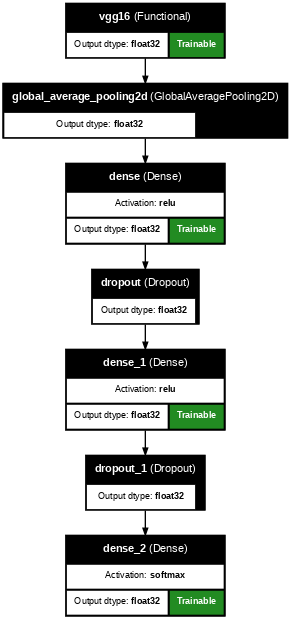

In [42]:
tf.keras.utils.plot_model(VGG16_model, to_file="SRIJA_BASAK_21BCE3506_VGG16model.png",show_shapes=False,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=48,
    #layer_range=True,
    show_layer_activations=True,
    show_trainable=True)

In [27]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
#Implementing early stopping
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
#Implementing ReduceLROnPlateau
lr_reduction=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=5,min_lr=1e-8)
#Implementing ModelCheckpoint
check_point=ModelCheckpoint('VGG16_model.keras',monitor='val_accuracy',save_best_only=True,mode='max')
history=VGG16_model.fit(train_data,
                  validation_data=val_data,
                  epochs=epochs,
                  callbacks=[early_stopping,lr_reduction,check_point])

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 127s 941ms/step - accuracy: 0.4028 - loss: 1.7916 - val_accuracy: 0.7571 - val_loss: 0.6080 - learning_rate: 1.0000e-04
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 47s 518ms/step - accuracy: 0.8335 - loss: 0.5274 - val_accuracy: 0.8559 - val_loss: 0.6231 - learning_rate: 1.0000e-04
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 85s 554ms/step - accuracy: 0.9329 - loss: 0.2904 - val_accuracy: 0.9887 - val_loss: 0.0769 - learning_rate: 1.0000e-04
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 45s 502ms/step - accuracy: 0.9703 - loss: 0.1668 - val_accuracy: 0.9435 - val_loss: 0.3871 - learning_rate: 1.0000e-04
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 86s 552ms/step - accuracy: 0.9417 - loss: 0.2891 - val_accuracy: 1.0000 - val_loss: 0.0527 - learning_rate: 1.0000e-04
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 46s 518ms/step - accuracy: 0.9931 - loss: 0.0756 - val_accuracy: 0.9972 - val_loss: 0.1245 - learning_rate: 1.0000e-04
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 46s 513ms/step - accuracy: 0.9

In [28]:
VGG16_model.evaluate(test_data)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.9923 - loss: 0.0701


[0.058117661625146866, 0.9971751570701599]

In [31]:
#Plotting the accuracy and loss over time
#Training history
history_data=history.history
#Separating validation and training accuracy
acc=history_data['accuracy']
val_acc=history_data['val_accuracy']
#Separating validation and training loss
loss=history_data['loss']
val_loss=history_data['val_loss']

SRIJA BASAK 21BCE3506


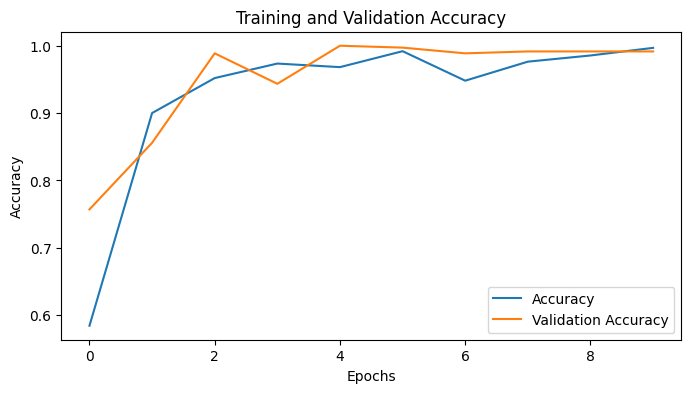

In [35]:
#Plotting
print("SRIJA BASAK 21BCE3506")
plt.figure(figsize=(8,4))
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Validation Accuracy'])




SRIJA BASAK 21BCE3506


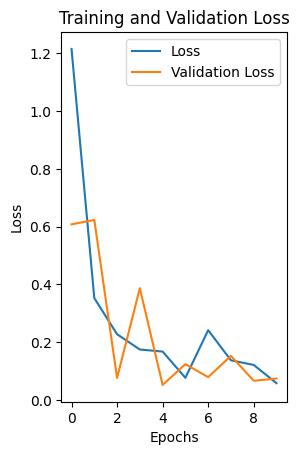

In [36]:
print("SRIJA BASAK 21BCE3506")
plt.subplot(1,2,2)
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])
plt.show()